In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('netflix.mplstyle')

In [2]:
reviews = pd.read_csv('data/reviews_clean.csv')
reviews.head()

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw5704482,raeldor-96879,After Life,9.0,Very Strong Season 2,3 May 2020,0,"I enjoyed the first season, but I must say I t...","['1', '1']"
1,rw5704483,dosleeb,The Valhalla Murders,6.0,Icelandic detectives?,3 May 2020,0,I know Iceland is a small country and police d...,"['2', '2']"
2,rw5704493,UniqueParticle,Unstoppable,8.0,Excellent last film of legendary Director Tony...,3 May 2020,0,A suspenseful thrilling adventure about a loos...,"['3', '4']"
3,rw5704496,Hellooo1234321,Dangerous Lies,NaN,Not bad,3 May 2020,0,Highlight was Camila Mendes exceptional acting...,"['2', '3']"
4,rw5704507,indieevan,The Master,8.0,"Great Potential, Less Great Execution",3 May 2020,0,"The premise was a 10, but the execution left a...","['1', '1']"


In [3]:
titles = pd.read_csv('data/netflix_titles_clean.csv')
titles.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
movies = titles[titles['type']=='Movie']
shows = titles[titles['type']=='TV Show']

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...
5989,5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
7537,7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


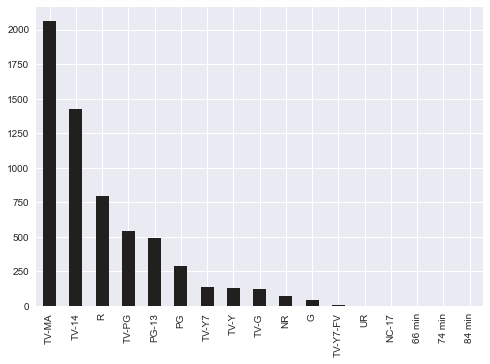

In [5]:
tv_rating_order = ('TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA')
tv_rating_meanings = ('All Children', 'Directed to Older Children', 'Directed to Older Children, Fantasy Violence', 'General Audience', 'Parental Guidance Suggested', 'Parents Strongly Cautioned', 'Mature Audience Only')

fig, ax = plt.subplots()
shows['rating'].value_counts().plot(kind='bar', ax=ax)
movies['rating'].value_counts().plot(kind='bar', ax=ax)

movies[movies['rating'].str.find('min') != -1].head()

In [9]:
content_by_country = titles.groupby(['country']).count()

content_by_country.head()

,Unnamed: 0,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
country,,,,,,,,,,,,
", France, Algeria",1,1,1,1,1,1,1,1,1,1,1,1
", South Korea",1,1,1,1,0,1,1,1,1,1,1,1
Argentina,56,56,56,56,40,51,56,56,56,56,56,56
"Argentina, Brazil, France, Poland, Germany, Denmark",1,1,1,1,1,1,1,1,1,1,1,1
"Argentina, Chile",2,2,2,2,2,2,2,2,2,2,2,2
